# Civil Servants Remuneration in the EU

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. First table
## Mean and median income by broad group of citizenship (population aged 18 and over)

LAST UPDATE: 22.08.22 17:37:26
EXTRACTION DATE: 29.08.22 11:31:53
SOURCE OF DATA: Eurostat

### Column names and data inside each
TIME: Year
GEO: Geo location
UNIT: Euro
INDIC_IL: Mean equivalized net income and Median equivalized net income
CITIZEN: EU, Non-EU, Foreign country, Reporting country
SEX: Total, Males, Females
AGE: From 18 to 54 years; From 18 to 59 years; From 18 to 64 years; 18 years or over; From 20 to 64 years; From 25 to 54 years; From 25 to 59 years; From 55 to 64 years; 55 years or over; 60 years or over; 65 years or over

In [2]:
# load data
df_income = pd.read_csv('/Volumes/GoogleDrive-114951830941804947409/My Drive/Data analyst/Projects/Civil Servants remuneration/original data/ilc_di15/ilc_di15_1_Data.csv')

### Check the overall characteristics of the data

In [3]:
# first look
df_income

,TIME,GEO,UNIT,INDIC_IL,CITIZEN,SEX,AGE,Value
0,2012,Belgium,Euro,Mean equivalised net income,Reporting country,Total,From 18 to 54 years,23 865
1,2012,Belgium,Euro,Mean equivalised net income,Reporting country,Total,From 18 to 59 years,23 950
2,2012,Belgium,Euro,Mean equivalised net income,Reporting country,Total,From 18 to 64 years,23 716
3,2012,Belgium,Euro,Mean equivalised net income,Reporting country,Total,18 years or over,22 365
4,2012,Belgium,Euro,Mean equivalised net income,Reporting country,Total,From 20 to 64 years,23 833
...,...,...,...,...,...,...,...,...
48835,2021,Kosovo (under United Nations Security Council ...,Purchasing power standard (PPS),Median equivalised net income,Reporting country,Females,From 25 to 59 years,:
48836,2021,Kosovo (under United Nations Security Council ...,Purchasing power standard (PPS),Median equivalised net income,Reporting country,Females,From 55 to 64 years,:
48837,2021,Kosovo (under United Nations Security Council ...,Purchasing power standard (PPS),Median equivalised net income,Reporting country,Females,55 years or over,:
48838,2021,Kosovo (under United Nations Security Council ...,Purchasing power standard (PPS),Median equivalised net income,Reporting country,Females,60 years or over,:


In [4]:
# print information about dataset
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TIME      48840 non-null  int64 
 1   GEO       48840 non-null  object
 2   UNIT      48840 non-null  object
 3   INDIC_IL  48840 non-null  object
 4   CITIZEN   48840 non-null  object
 5   SEX       48840 non-null  object
 6   AGE       48840 non-null  object
 7   Value     48840 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.0+ MB


In [5]:
# change the column names to lowercase
df_income.columns = df_income.columns.str.lower()

In [6]:
# drop the irrelevant rows
df_income.drop(df_income[df_income.unit == "Purchasing power standard (PPS)"].index, axis=0, inplace=True)

# drop the irrelevant columns
df_income.drop(['unit', 'citizen'], axis=1, inplace=True)

# reset index and drop the old one
df_income.reset_index(drop=True, inplace=True)

In [7]:
# clean the values in the "value" column
df_income.value.replace(":", np.NaN, regex=True, inplace=True) # change the ":" to NaN
df_income.value.replace(" ", "", regex=True, inplace=True) # remove spaces between the thousand separator
df_income.value.astype('float') # change the data type to float

0        23865.0
1        23950.0
2        23716.0
3        22365.0
4        23833.0
          ...   
24415        NaN
24416        NaN
24417        NaN
24418        NaN
24419        NaN
Name: value, Length: 24420, dtype: float64

In [8]:
# delete the " equivalized net income" from the indic_il values
df_income.indic_il.replace(" equivalised net income", "", regex=True, inplace=True)
# (OPTIONAL) default='warn' ## disable the false positives warnings
pd.options.mode.chained_assignment = None

In [9]:
# drop null values
df_income.dropna(inplace=True)

In [10]:
# merge the data to have two columns for mean and median values
df_income_mean = df_income[df_income.indic_il == "Mean"] # filter the mean rows
df_income_median = df_income[df_income.indic_il == "Median"] # filter the median rows
df_income = pd.merge(df_income_mean, df_income_median, on=['geo', 'time', 'age', 'sex'], how='left', right_index=False, left_index=False) # merge data

df_income.drop(['indic_il_x', 'indic_il_y'], axis=1, inplace=True) # drop the irrelevant columns

df_income.rename(columns={'value_x': 'value_mean',
                          'value_y': 'value_median'},
                          inplace=True) # rename the two new columns
# change the dtype of the value columns
df_income.value_mean = df_income.value_mean.astype('float64')
df_income.value_median = df_income.value_median.astype('float64')

In [11]:
# simplify the age column
df_income.replace('From ','', regex=True, inplace=True)
df_income.replace(' years','', regex=True, inplace=True)

### Vizual assessment
#### 1. Data spread

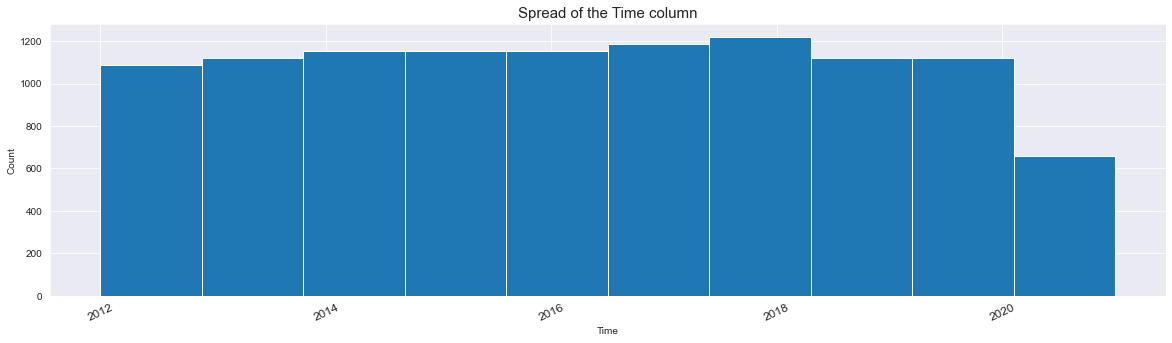

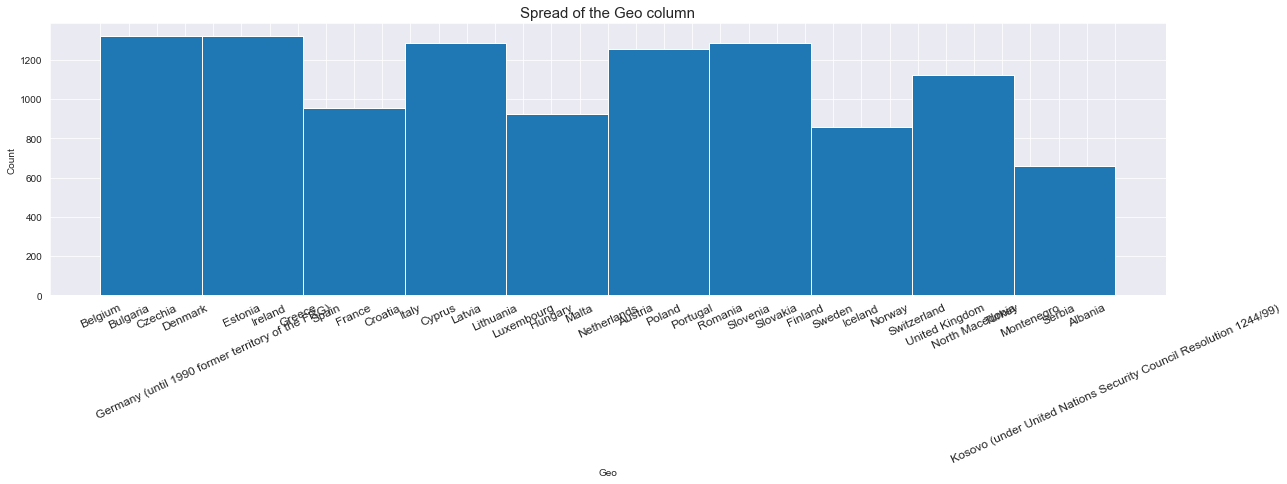

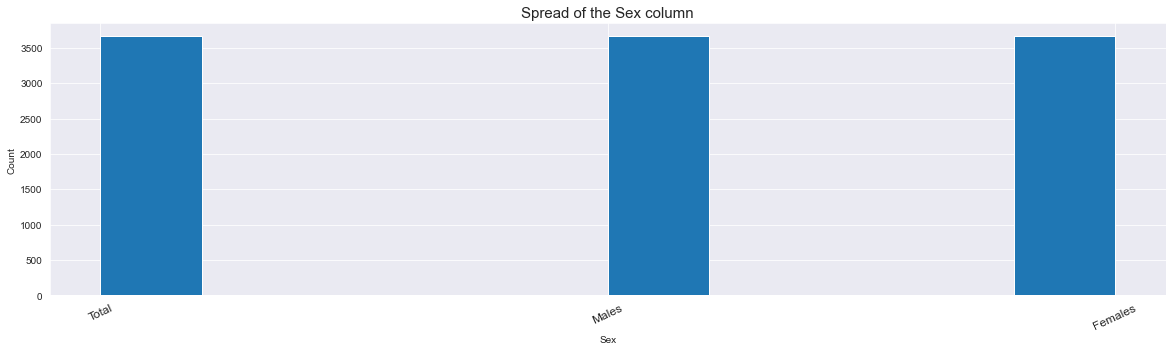

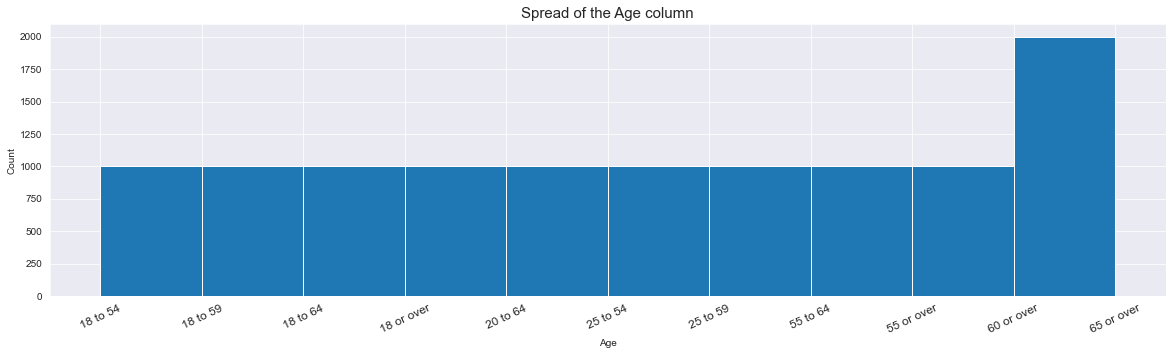

In [12]:
# loop through the non-value columns to check the spread
for i in range(0, 4):
    x = df_income.columns[i]
    plt.figure(figsize=[20,5])
    plt.hist(data=df_income, x=x)
    plt.xlabel(f'{x.title()}')
    plt.ylabel('Count')
    plt.title(f'Spread of the {x.title()} column', fontsize=15)
    plt.xticks(rotation=25, fontsize=12)
    plt.show();

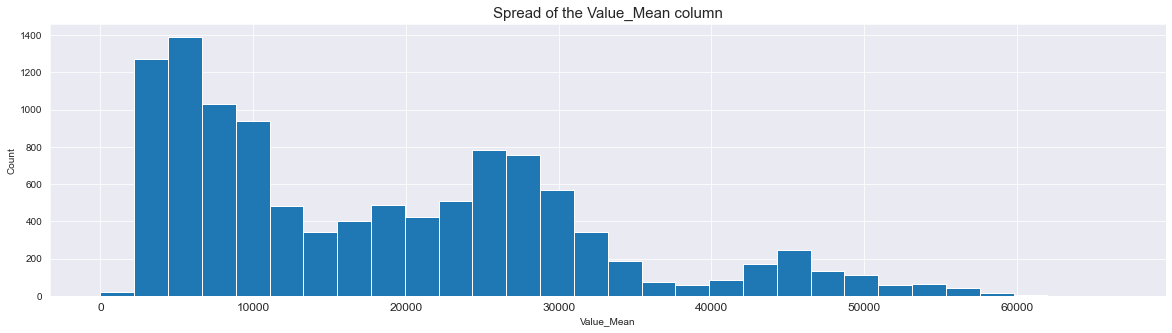

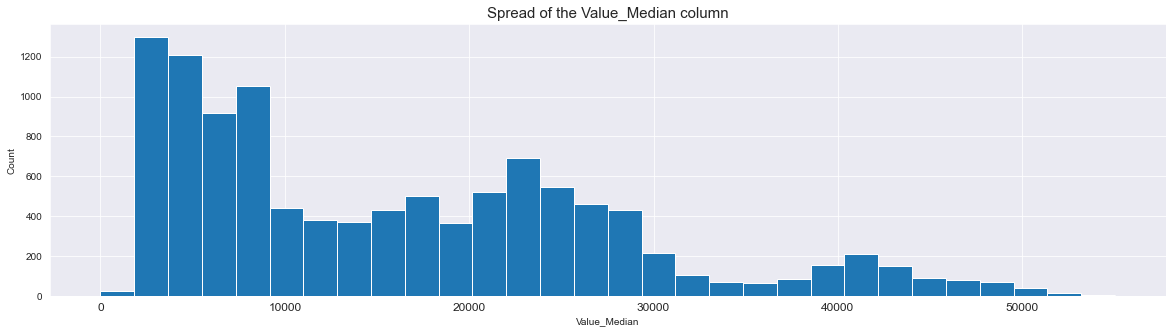

In [13]:
# loop through the value columns to check the spread
for i in range(4, 6):
    x = df_income.columns[i]
    plt.figure(figsize=[20,5])
    max_value = df_income[f'{x}'].max()
    bin_edge = max_value / 30
    bins = np.arange(0, max_value+bin_edge, bin_edge)
    plt.hist(data=df_income, x=x, bins=bins)
    plt.xlabel(f'{x.title()}')
    plt.ylabel('Count')
    plt.title(f'Spread of the {x.title()} column', fontsize=15)
    plt.xticks(fontsize=12)
    plt.show();